# Tensor Decompositions & Decoding

In [1]:
# Import packages

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


###############

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


###############

import tensorly as tl
from tensorly.decomposition import tucker,non_negative_tucker,parafac,non_negative_parafac
from tensorly import tucker_to_tensor
from tensorly.cp_tensor import cp_to_tensor

###############

In [2]:
# Import data & events structure
X=pd.read_pickle('X.pkl')
Y=pd.read_pickle('og_df_Y.pkl')

### Tensor decompositions: PARAFAC Decomposition
http://tensorly.org/stable/user_guide/tensor_decomposition.html

In [3]:
# Reshape structure into a (trial x time x channel) structure & apply algorithm 

n_components=3

X_tensor=tl.tensor(X.values.reshape(477,700,60))

factors_para = parafac(X_tensor ,rank=n_components)
print('PARAFAC output structure: ', factors_para)

PARAFAC output structure:  (weights, factors) : rank-3 CPTensor of shape (477, 700, 60) 


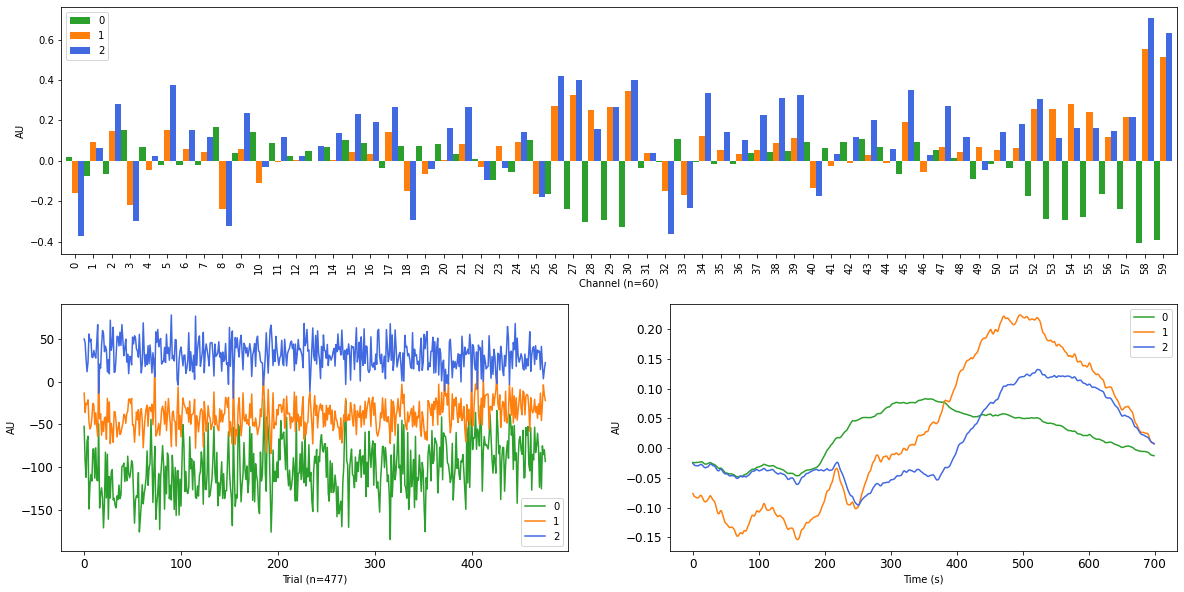

In [4]:
# Plot outputs

pd1 = pd.DataFrame(factors_para[1][0])
pd2 = pd.DataFrame(factors_para[1][1])
pd3 = pd.DataFrame(factors_para[1][2])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 


pd3.plot(ax=ax1, 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='AU', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax1.set_xticklabels(X.columns)


pd1.plot(ax=ax2,
         kind='line',  
         xlabel='Trial (n=477)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

pd2.plot(ax=ax3,
         kind='line',  
         xlabel='Time (s)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

Text(-0.999760000000002, 0.5, 'Components')

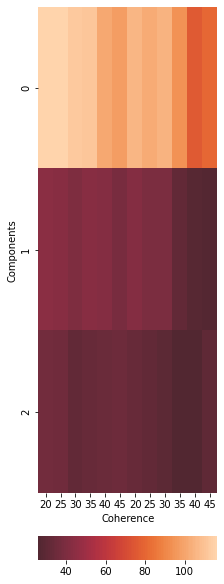

In [5]:
# Plot components across trials

Z = pd1

a = Z.iloc[0:39].abs().mean()
b = Z.iloc[39:79].abs().mean()
c = Z.iloc[79:119].abs().mean()
d = Z.iloc[119:159].abs().mean()
e = Z.iloc[159:199].abs().mean()
f = Z.iloc[199:239].abs().mean()

g = Z.iloc[239:279].abs().mean()
h = Z.iloc[279:319].abs().mean()
i = Z.iloc[319:358].abs().mean()
j = Z.iloc[358:397].abs().mean()
k = Z.iloc[397:437].abs().mean()
l = Z.iloc[437:478].abs().mean()

horizontal_stack = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l], axis=1)
pd1 = horizontal_stack.T

names = ['20', '25', '30', '35', '40', '45', '20', '25', '30', '35', '40', '45']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(3,8), constrained_layout=True)

ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=names)

ax.set_xlabel('Coherence')
ax.set_ylabel('Components')

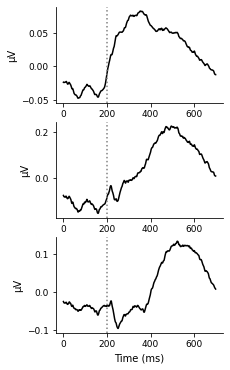

In [6]:
# Plot components across time

%matplotlib inline

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.9997599999999984, 0.5, 'Components')

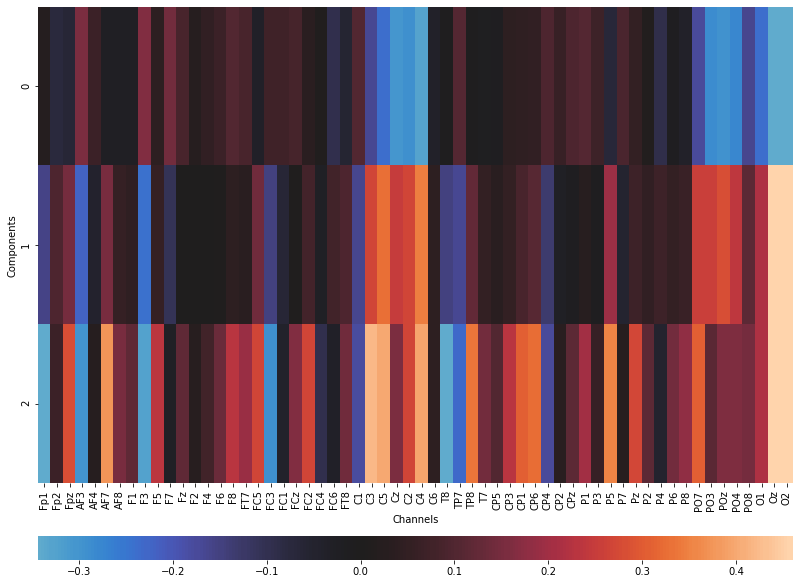

In [7]:
# Plot components across channels

%matplotlib inline

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,8), constrained_layout=True)


ax = sns.heatmap(pd3.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

## Tensor decompositions: Non-negative-PARAFAC Decomposition

http://tensorly.org/stable/user_guide/tensor_decomposition.html

In [8]:
# Run & apply model

n_components=2

factors_nnpara = non_negative_parafac(X_tensor, rank=n_components)
print('Non-negative-PARAFAC output structure: ', factors_para)

Non-negative-PARAFAC output structure:  (weights, factors) : rank-3 CPTensor of shape (477, 700, 60) 


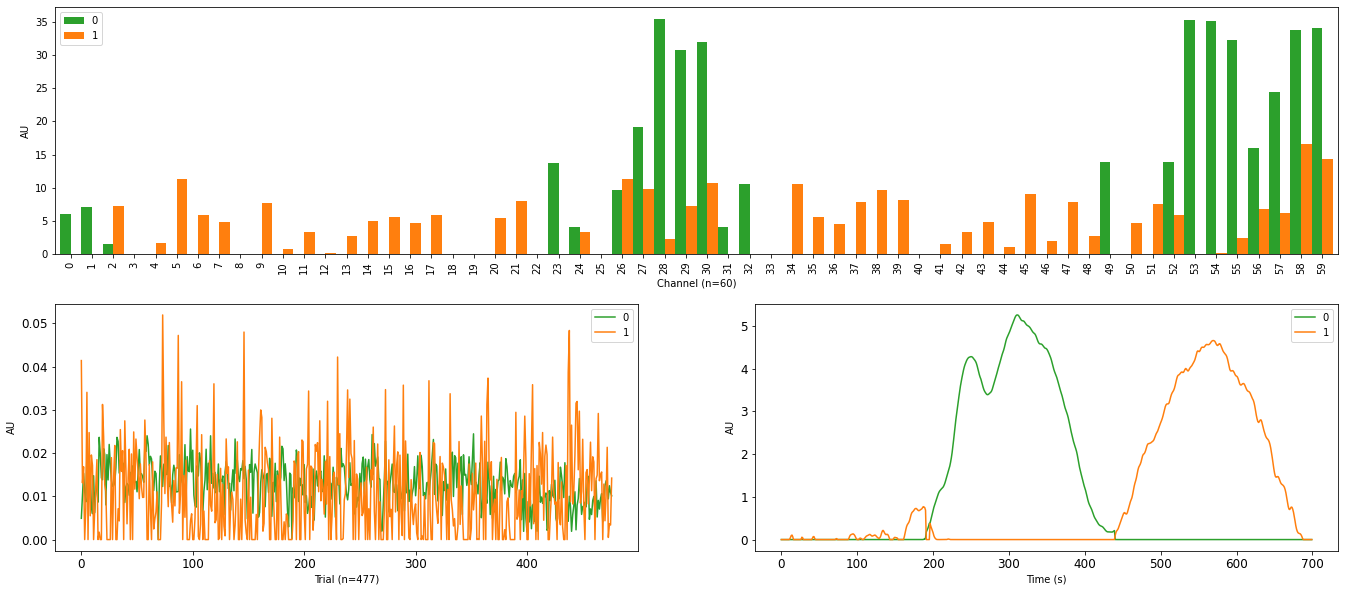

In [9]:
# Plot outputs

pd1 = pd.DataFrame(factors_nnpara[1][0])
pd2 = pd.DataFrame(factors_nnpara[1][1])
pd3 = pd.DataFrame(factors_nnpara[1][2])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(23,10))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 


pd3.plot(ax=ax1, 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='AU', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax1.set_xticklabels(X.columns)


pd1.plot(ax=ax2,
         kind='line',  
         xlabel='Trial (n=477)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

pd2.plot(ax=ax3,
         kind='line',  
         xlabel='Time (s)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

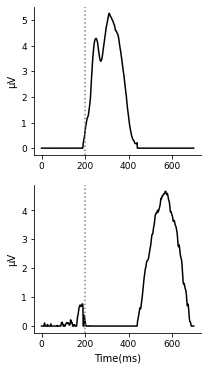

In [10]:
# Plot components across time

fix, ax = plt.subplots(2, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
                 xlabel='Time(ms)',
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

# im = pd2[2].plot(ax=ax[2],
#                  kind='line',  
#             xlabel='Time (ms)', 
#             ylabel='μV', 
#             fontsize=9, 
#             color=['black'])

# im.spines['top'].set_visible(False)
# im.spines['right'].set_visible(False)
# im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.999760000000002, 0.5, 'Components')

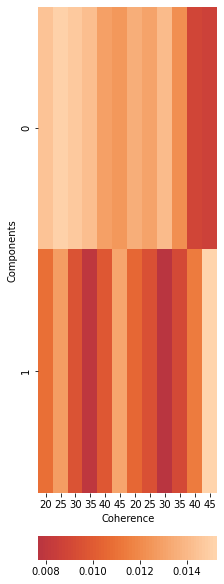

In [11]:
# Plot components across trials

Z = pd1

a = Z.iloc[0:39].abs().mean()
b = Z.iloc[39:79].abs().mean()
c = Z.iloc[79:119].abs().mean()
d = Z.iloc[119:159].abs().mean()
e = Z.iloc[159:199].abs().mean()
f = Z.iloc[199:239].abs().mean()

g = Z.iloc[239:279].abs().mean()
h = Z.iloc[279:319].abs().mean()
i = Z.iloc[319:358].abs().mean()
j = Z.iloc[358:397].abs().mean()
k = Z.iloc[397:437].abs().mean()
l = Z.iloc[437:478].abs().mean()

horizontal_stack = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l], axis=1)
pd1 = horizontal_stack.T

names = ['20', '25', '30', '35', '40', '45', '20', '25', '30', '35', '40', '45']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(3,8), constrained_layout=True)

ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=names)

ax.set_xlabel('Coherence')
ax.set_ylabel('Components')

Text(-0.9997599999999984, 0.5, 'Components')

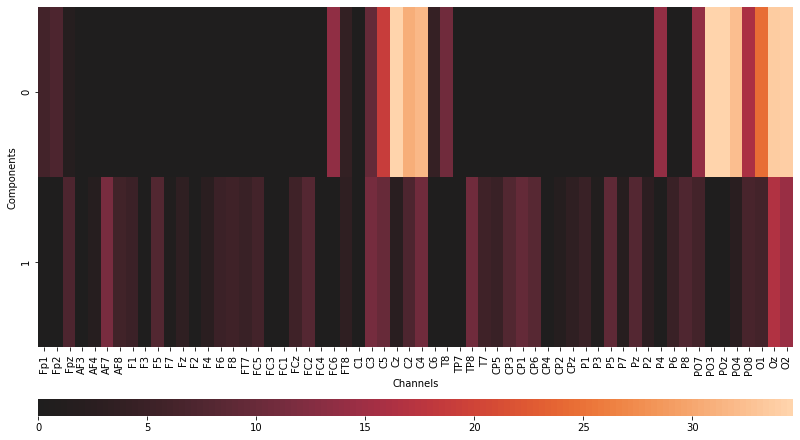

In [12]:
# Plot components across channels

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,6), constrained_layout=True)


ax = sns.heatmap(pd3.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

## Tensor decompositions: Tucker decomposition
http://tensorly.org/stable/user_guide/tensor_decomposition.html

In [13]:
# Apply model to tensor

n_components=3

core, factors_tuck = tucker(X_tensor ,rank=[n_components,n_components,n_components])

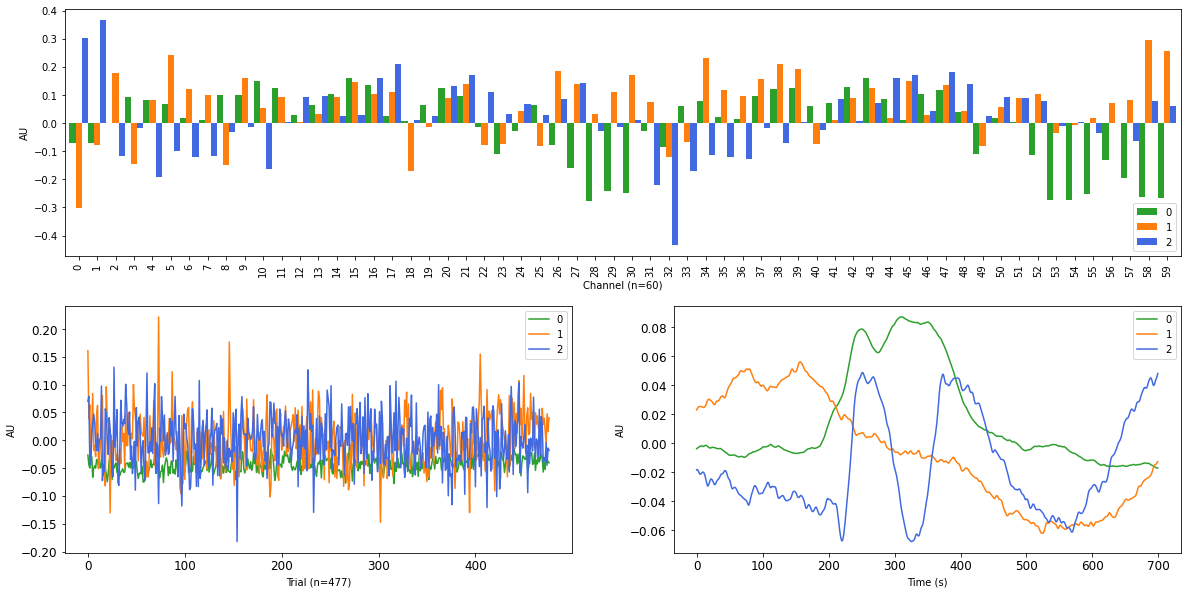

In [14]:
# Plot outputs

pd1 = pd.DataFrame(factors_tuck[0])
pd2 = pd.DataFrame(factors_tuck[1])
pd3 = pd.DataFrame(factors_tuck[2])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 


pd3.plot(ax=ax1, 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='AU', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax1.set_xticklabels(X.columns)


pd1.plot(ax=ax2,
         kind='line',  
         xlabel='Trial (n=477)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

pd2.plot(ax=ax3,
         kind='line',  
         xlabel='Time (s)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

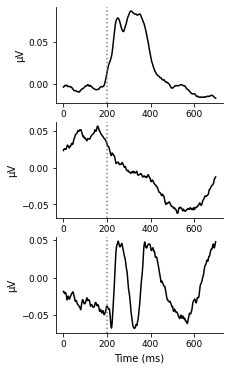

In [15]:
# Plot components across time

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.999760000000002, 0.5, 'Components')

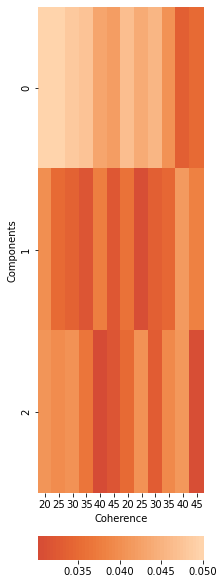

In [16]:
# Plot components across trials

Z = pd1

a = Z.iloc[0:39].abs().mean()
b = Z.iloc[39:79].abs().mean()
c = Z.iloc[79:119].abs().mean()
d = Z.iloc[119:159].abs().mean()
e = Z.iloc[159:199].abs().mean()
f = Z.iloc[199:239].abs().mean()

g = Z.iloc[239:279].abs().mean()
h = Z.iloc[279:319].abs().mean()
i = Z.iloc[319:358].abs().mean()
j = Z.iloc[358:397].abs().mean()
k = Z.iloc[397:437].abs().mean()
l = Z.iloc[437:478].abs().mean()

horizontal_stack = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l], axis=1)
pd1 = horizontal_stack.T

names = ['20', '25', '30', '35', '40', '45', '20', '25', '30', '35', '40', '45']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(3,8), constrained_layout=True)

ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=names)

ax.set_xlabel('Coherence')
ax.set_ylabel('Components')

Text(-0.9997599999999984, 0.5, 'Components')

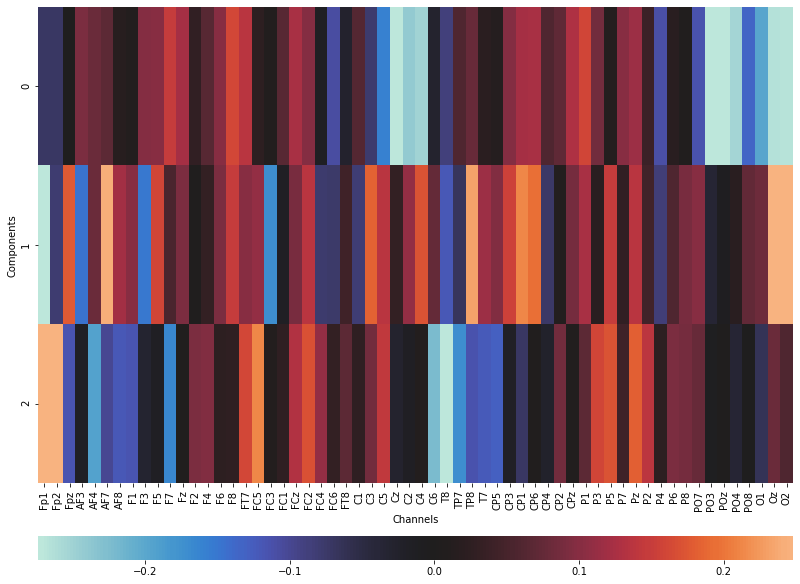

In [17]:
# Plot components across channels

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,8), constrained_layout=True)


ax = sns.heatmap(pd3.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

## Tensor decompositions: Non-negative Tucker
http://tensorly.org/stable/user_guide/tensor_decomposition.html

In [18]:
# Apply model

n_components=2

core, factors_nnt = non_negative_tucker(X_tensor ,rank=[n_components,n_components,n_components])

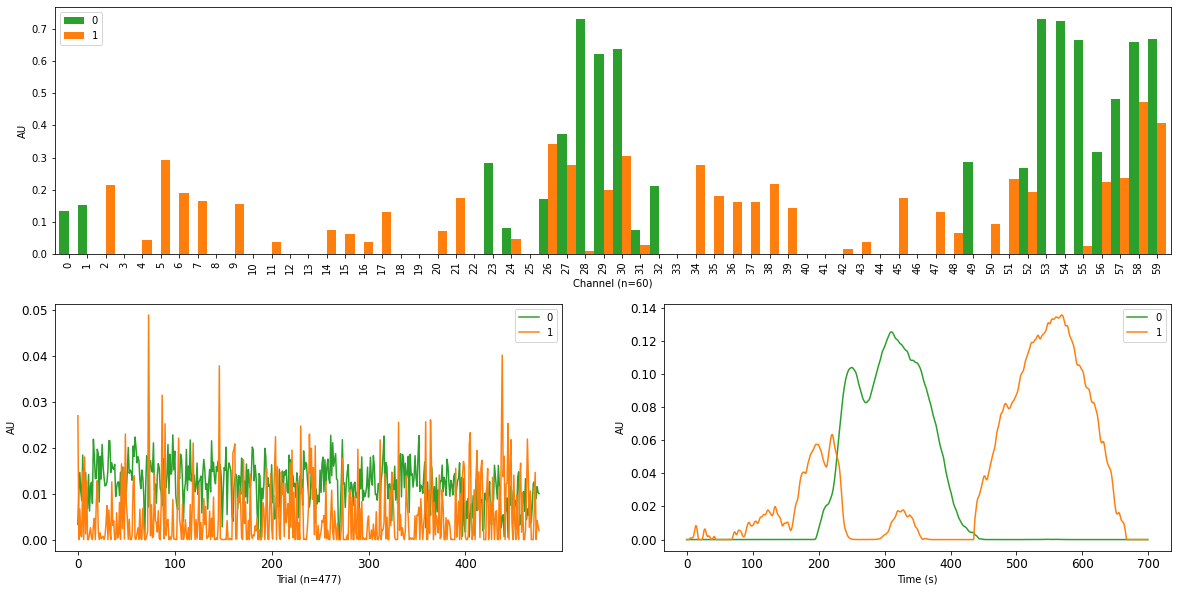

In [19]:
# Plot outputs

pd1 = pd.DataFrame(factors_nnt[0])
pd2 = pd.DataFrame(factors_nnt[1])
pd3 = pd.DataFrame(factors_nnt[2])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 


pd3.plot(ax=ax1, 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='AU', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax1.set_xticklabels(X.columns)


pd1.plot(ax=ax2,
         kind='line',  
         xlabel='Trial (n=477)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

pd2.plot(ax=ax3,
         kind='line',  
         xlabel='Time (s)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

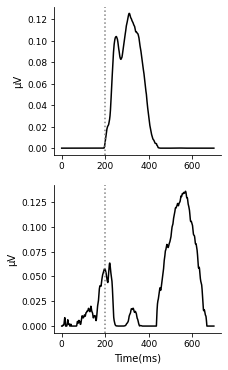

In [20]:
# Plot components across time

fix, ax = plt.subplots(2, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
                 xlabel='Time(ms)',
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

# im = pd2[2].plot(ax=ax[2],
#                  kind='line',  
#             xlabel='Time (ms)', 
#             ylabel='μV', 
#             fontsize=9, 
#             color=['black'])

# im.spines['top'].set_visible(False)
# im.spines['right'].set_visible(False)
# im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.999760000000002, 0.5, 'Components')

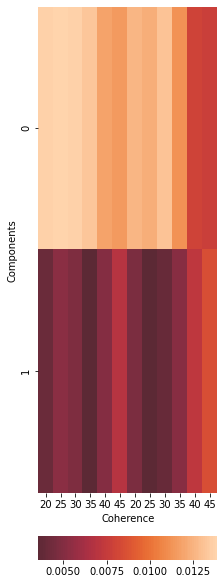

In [21]:
# Plot components across trials

Z = pd1

a = Z.iloc[0:39].abs().mean()
b = Z.iloc[39:79].abs().mean()
c = Z.iloc[79:119].abs().mean()
d = Z.iloc[119:159].abs().mean()
e = Z.iloc[159:199].abs().mean()
f = Z.iloc[199:239].abs().mean()

g = Z.iloc[239:279].abs().mean()
h = Z.iloc[279:319].abs().mean()
i = Z.iloc[319:358].abs().mean()
j = Z.iloc[358:397].abs().mean()
k = Z.iloc[397:437].abs().mean()
l = Z.iloc[437:478].abs().mean()

horizontal_stack = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l], axis=1)
pd1 = horizontal_stack.T

names = ['20', '25', '30', '35', '40', '45', '20', '25', '30', '35', '40', '45']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(3,8), constrained_layout=True)

ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=names)

ax.set_xlabel('Coherence')
ax.set_ylabel('Components')

Text(-0.9997599999999984, 0.5, 'Components')

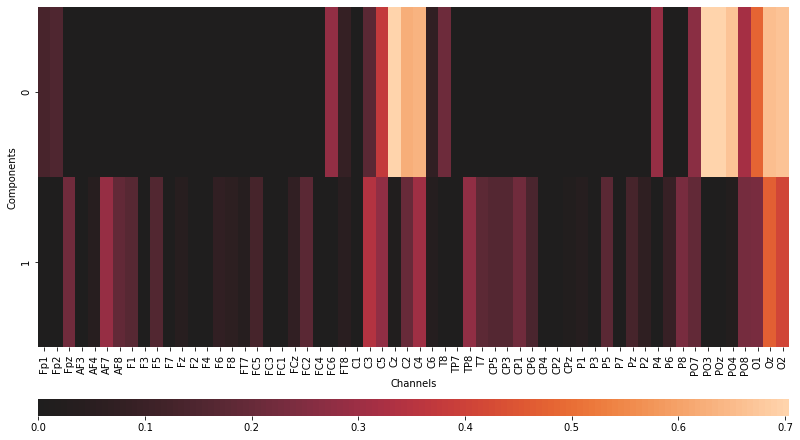

In [22]:
# Plot components across channels

%matplotlib inline

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,6), constrained_layout=True)


ax = sns.heatmap(pd3.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

## Task Decoding

In [23]:
# Define a function that will train & cross-validate the models capability at determining faces vs cars & plot the results

def face_car_cross_validation(factor, task):

    fig = plt.figure(figsize=(12,12), tight_layout=True)
    gs = gridspec.GridSpec(3, 2, width_ratios=[2,0.5])

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0]) 
    ax3 = fig.add_subplot(gs[2, 0]) 
    ax4 = fig.add_subplot(gs[:, 1])
    ax4.set_box_aspect(aspect=20)

    ######

    X_train, X_test, y_train, y_test = train_test_split(factor,task,train_size=0.85,stratify=task)
    class_names = 'Face', 'Car'

    # ######

    model=LDA()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    LDA_acc_tuck=accuracy_score(y_test,y_pred)
    kfold = KFold(n_splits=10, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    group_names = ['True',
                   'False',
                   'False',
                   'True']

    group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(conf, 
                ax=ax1, 
                cbar=False, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu',
                square=True,
                annot=labels, 
                fmt='')

    ax1.set_title('Linear discriminant analysis (LDA)')

    print('Single iteration LDA Accuracy score: ', LDA_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    print(sum_stats(conf))

    # ######

    model=GaussianNB()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    GNB_acc_tuck = accuracy_score(y_test,y_pred)
    kfold = KFold(n_splits=10, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    group_names = ['True',
                   'False',
                   'False',
                   'True']

    group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(conf,
                ax=ax2, 
                cbar=False, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu', 
                square=True,
                annot=labels, 
                fmt='')

    ax2.set_title('Gaussian Naive Bayes')

    print('Single iteration Gaussian Naive Bayes Accuracy score: ', GNB_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    print(sum_stats(conf))

    # ######

    model = KNN()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    KNN_acc_tuck = accuracy_score(y_test,y_pred)

    kfold = KFold(n_splits=10, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    group_names = ['True',
                   'False',
                   'False',
                   'True']

    group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(conf,
                ax=ax3, 
                cbar=True,
                cbar_ax=ax4, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu',
                square=True,
                annot=labels, 
                fmt='')

    ax3.set_title('K-nearest neighbors')

    print('Single iteration K-nearest neighbors Accuracy score: ', KNN_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    print(sum_stats(conf))

    ax1.set_ylabel('True label'); 
    ax2.set_ylabel('True label'); 
    ax3.set_ylabel('True label');

    ax1.set_xlabel('Predicted label');
    ax2.set_xlabel('Predicted label'); 
    ax3.set_xlabel('Predicted label');

    plt.show()

In [24]:
# Define a function that will train & cross-validate the models capability at determining coherence of stimulus presented & plot the results

def difficulty_cross_validation(factor, task):

    fig = plt.figure(figsize=(12,12), tight_layout=True)
    gs = gridspec.GridSpec(3, 2, width_ratios=[2,0.5])

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0]) 
    ax3 = fig.add_subplot(gs[2, 0]) 
    ax4 = fig.add_subplot(gs[:, 1])
    ax4.set_box_aspect(aspect=20)

    ######

    X_train, X_test, y_train, y_test = train_test_split(factor,task,train_size=0.85,stratify=task)
    class_names = '1', '2', '3', '4', '5', '6'

    # ######

    model=LDA()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    LDA_acc_tuck=accuracy_score(y_test,y_pred)
    kfold = KFold(n_splits=10, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    sns.heatmap(conf, 
                ax=ax1, 
                cbar=False, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu',
                square=True,
                annot=True)

    ax1.set_title('Linear discriminant analysis (LDA)')

    x=1/6
    print('Significance above', "%.2f" % x)

    print('Single iteration LDA Accuracy score: ', "%.2f" % LDA_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

    # ######

    model=GaussianNB()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    GNB_acc_tuck = accuracy_score(y_test,y_pred)
    kfold = KFold(n_splits=10, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    sns.heatmap(conf,
                ax=ax2, 
                cbar=False, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu', 
                square=True,
                annot=True)

    ax2.set_title('Gaussian Naive Bayes')

    print('Single iteration Gaussian Naive Bayes Accuracy score: ' , "%.2f" % GNB_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

    # ######

    model = KNN()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    KNN_acc_tuck = accuracy_score(y_test,y_pred)

    kfold = KFold(n_splits=10, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    sns.heatmap(conf,
                ax=ax3, 
                cbar=True,
                cbar_ax=ax4, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu',
                square=True,
                annot=True)

    ax3.set_title('K-nearest neighbors')

    print('Single iteration K-nearest neighbors Accuracy score: ', "%.2f" % KNN_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

    ax1.set_ylabel('True label'); 
    ax2.set_ylabel('True label'); 
    ax3.set_ylabel('True label');

    ax1.set_xlabel('Predicted label');
    ax2.set_xlabel('Predicted label'); 
    ax3.set_xlabel('Predicted label');

    plt.show()

In [25]:
# Define a function that will print the summary statistics

def sum_stats(conf):
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(conf) / float(np.sum(conf))
        precision = conf[1,1] / sum(conf[:,1])
        recall    = conf[1,1] / sum(conf[1,:])
        f1_score  = 2*precision*recall / (precision + recall)
        print('accuracy:', "%.2f" % accuracy, 
              'precision:', "%.2f" % precision,
              'recall:', "%.2f" % recall,
              'f1_score:', "%.2f" % f1_score)

### Decode the tasks using each algorithm + LDA, NBA & KNN classifiers

In [26]:
para = factors_para[1][0]
nnpara = factors_nnpara[1][0]
tuck = factors_tuck[0]
nntuck = factors_nnt[0]

facecar = Y.iloc[:,0]
coherence = Y.iloc[:,1]

Single iteration LDA Accuracy score:  0.7083333333333334
Cross validated score (Mean (Std)): 62.32% (19.92%)
accuracy: 0.64 precision: 0.66 recall: 0.58 f1_score: 0.62
None
Single iteration Gaussian Naive Bayes Accuracy score:  0.7083333333333334
Cross validated score (Mean (Std)): 64.46% (17.21%)
accuracy: 0.65 precision: 0.69 recall: 0.56 f1_score: 0.62
None
Single iteration K-nearest neighbors Accuracy score:  0.5416666666666666
Cross validated score (Mean (Std)): 65.54% (18.59%)
accuracy: 0.64 precision: 0.64 recall: 0.64 f1_score: 0.64
None


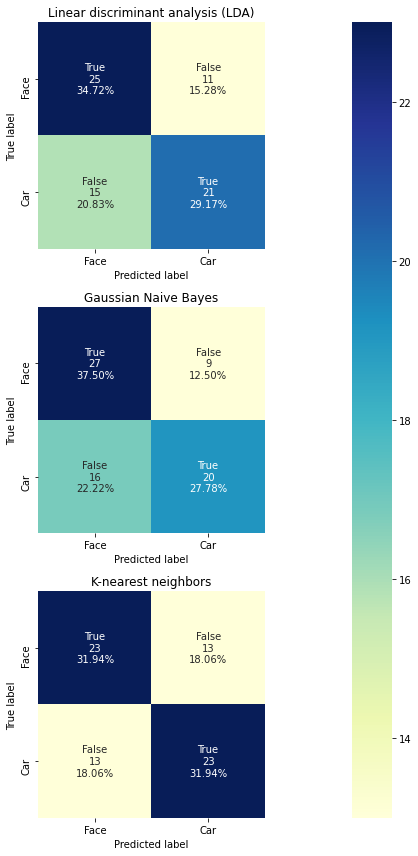

#####
Significance above 0.17
Single iteration LDA Accuracy score:  0.21
Cross validated score (Mean (Std)): 8.57% (9.48%)
Single iteration Gaussian Naive Bayes Accuracy score:  0.22
Cross validated score (Mean (Std)): 19.11% (16.33%)
Single iteration K-nearest neighbors Accuracy score:  0.21
Cross validated score (Mean (Std)): 19.46% (12.99%)


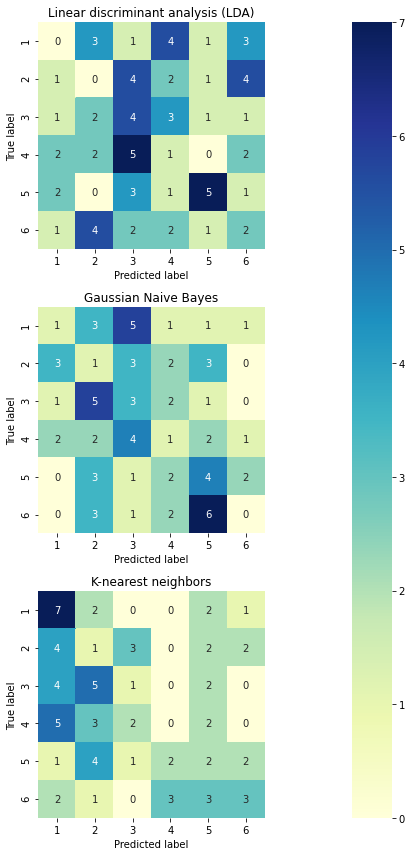

In [27]:
%matplotlib inline

face_car_cross_validation(factor=para, task=facecar)

print("#####")

difficulty_cross_validation(factor=para, task=coherence)

Single iteration LDA Accuracy score:  0.5972222222222222
Cross validated score (Mean (Std)): 52.86% (19.02%)
accuracy: 0.43 precision: 0.42 recall: 0.36 f1_score: 0.39
None
Single iteration Gaussian Naive Bayes Accuracy score:  0.5972222222222222
Cross validated score (Mean (Std)): 50.36% (21.91%)
accuracy: 0.49 precision: 0.49 recall: 0.50 f1_score: 0.49
None
Single iteration K-nearest neighbors Accuracy score:  0.5138888888888888
Cross validated score (Mean (Std)): 46.96% (16.52%)
accuracy: 0.51 precision: 0.51 recall: 0.53 f1_score: 0.52
None


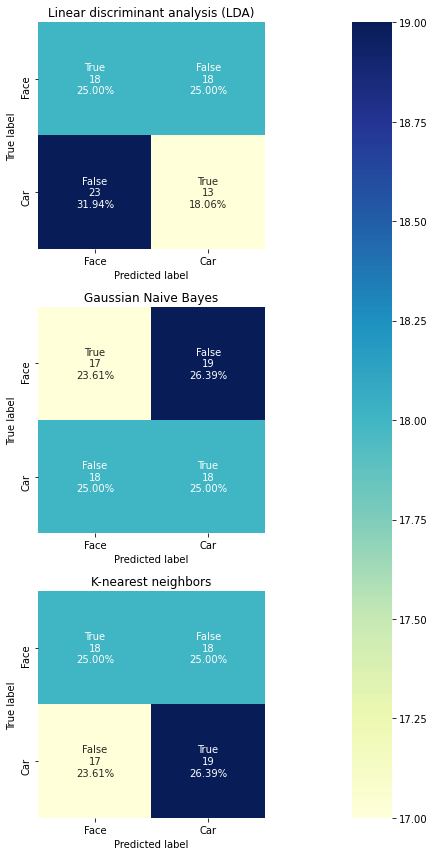

Significance above 0.17
Single iteration LDA Accuracy score:  0.24
Cross validated score (Mean (Std)): 26.96% (13.66%)
Single iteration Gaussian Naive Bayes Accuracy score:  0.25
Cross validated score (Mean (Std)): 20.54% (13.77%)
Single iteration K-nearest neighbors Accuracy score:  0.21
Cross validated score (Mean (Std)): 23.21% (12.70%)


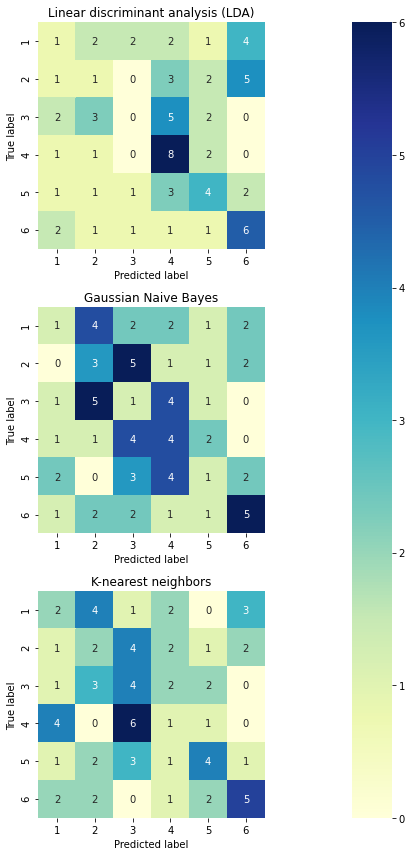

In [28]:
face_car_cross_validation(factor=nnpara, task=facecar)
difficulty_cross_validation(factor=nnpara, task=coherence)

Single iteration LDA Accuracy score:  0.6111111111111112
Cross validated score (Mean (Std)): 61.25% (13.22%)
accuracy: 0.57 precision: 0.56 recall: 0.61 f1_score: 0.59
None
Single iteration Gaussian Naive Bayes Accuracy score:  0.5972222222222222
Cross validated score (Mean (Std)): 48.39% (17.28%)
accuracy: 0.50 precision: 0.50 recall: 0.56 f1_score: 0.53
None
Single iteration K-nearest neighbors Accuracy score:  0.5277777777777778
Cross validated score (Mean (Std)): 59.64% (17.21%)
accuracy: 0.53 precision: 0.53 recall: 0.53 f1_score: 0.53
None


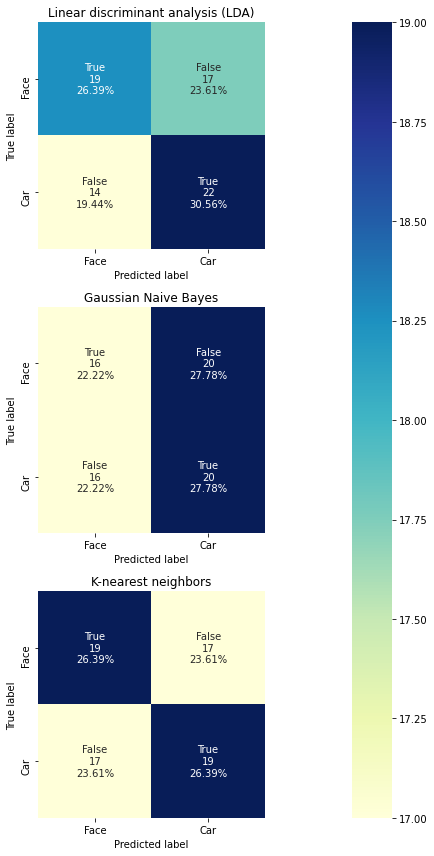

Significance above 0.17
Single iteration LDA Accuracy score:  0.18
Cross validated score (Mean (Std)): 13.21% (13.72%)
Single iteration Gaussian Naive Bayes Accuracy score:  0.17
Cross validated score (Mean (Std)): 16.43% (11.46%)
Single iteration K-nearest neighbors Accuracy score:  0.24
Cross validated score (Mean (Std)): 19.82% (11.53%)


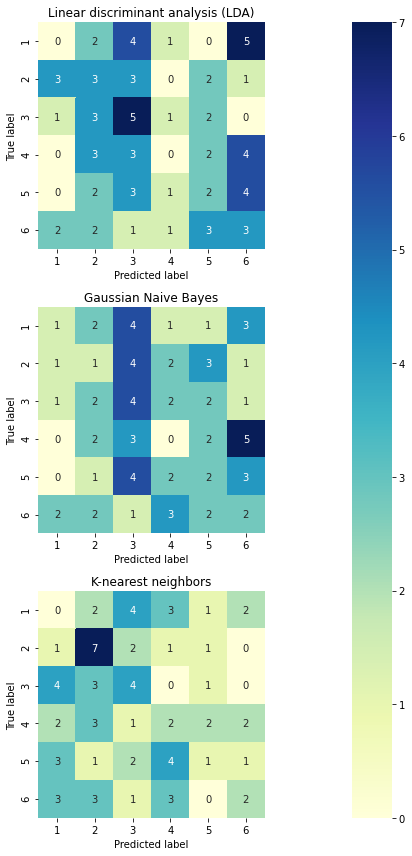

In [29]:
face_car_cross_validation(factor=tuck, task=facecar)
difficulty_cross_validation(factor=tuck, task=coherence)

Single iteration LDA Accuracy score:  0.6666666666666666
Cross validated score (Mean (Std)): 60.71% (21.20%)
accuracy: 0.54 precision: 0.55 recall: 0.50 f1_score: 0.52
None
Single iteration Gaussian Naive Bayes Accuracy score:  0.6388888888888888
Cross validated score (Mean (Std)): 57.14% (17.51%)
accuracy: 0.58 precision: 0.59 recall: 0.53 f1_score: 0.56
None
Single iteration K-nearest neighbors Accuracy score:  0.5833333333333334
Cross validated score (Mean (Std)): 64.11% (16.30%)
accuracy: 0.58 precision: 0.58 recall: 0.58 f1_score: 0.58
None


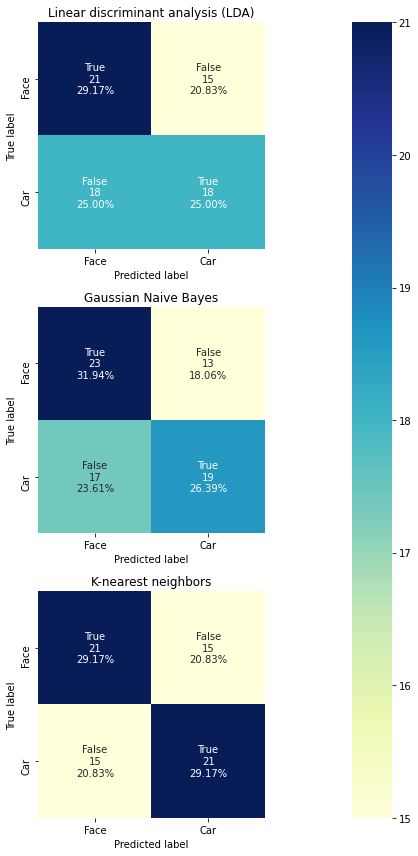

Significance above 0.17
Single iteration LDA Accuracy score:  0.19
Cross validated score (Mean (Std)): 15.00% (12.48%)
Single iteration Gaussian Naive Bayes Accuracy score:  0.18
Cross validated score (Mean (Std)): 16.79% (10.81%)
Single iteration K-nearest neighbors Accuracy score:  0.08
Cross validated score (Mean (Std)): 18.04% (14.21%)


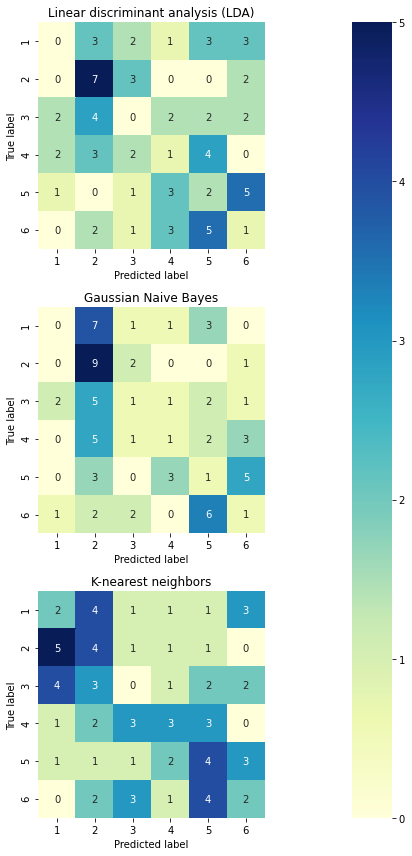

In [30]:
face_car_cross_validation(factor=nntuck, task=facecar)
difficulty_cross_validation(factor=nntuck, task=coherence)

### Produce single-iteration accuracy scores for Face vs Car Discrimination

In [31]:
ranks=[1, 2, 3]

model1=LDA()
model2=GaussianNB()
model3=KNN()

models={model1,model2,model3}

In [87]:
### Single Iteration

task=facecar

Tucker_performance_facecar_LDA=[]
NNTucker_performance_facecar_LDA=[]
PARAFAC_performance_facecar_LDA=[]
NNPARAFAC_performance_facecar_LDA=[]

Tucker_performance_facecar_GNB=[]
NNTucker_performance_facecar_GNB=[]
PARAFAC_performance_facecar_GNB=[]
NNPARAFAC_performance_facecar_GNB=[]

Tucker_performance_facecar_KNN=[]
NNTucker_performance_facecar_KNN=[]
PARAFAC_performance_facecar_KNN=[]
NNPARAFAC_performance_facecar_KNN=[]

for i in ranks:
    core, factors_tuck = tucker(X_tensor ,rank=[i,i,i])
    core, factors_nnt = non_negative_tucker(X_tensor ,rank=[i,i,i])
    factors_nnpara = non_negative_parafac(X_tensor ,rank=i)
    factors_para = parafac(X_tensor ,rank=i)
    
    for model in models:
        
        X_train, X_test, y_train, y_test=train_test_split(factors_tuck[0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        if model==model1:
            Tucker_performance_facecar_LDA.append(accuracy_score(y_test,y_pred))
        elif model==model2:
            Tucker_performance_facecar_GNB.append(accuracy_score(y_test,y_pred))
        elif model==model3:
            Tucker_performance_facecar_KNN.append(accuracy_score(y_test,y_pred))
        
        X_train, X_test, y_train, y_test=train_test_split(factors_nnt[0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
                
        if model==model1:
            NNTucker_performance_facecar_LDA.append(accuracy_score(y_test,y_pred))
        elif model==model2:
            NNTucker_performance_facecar_GNB.append(accuracy_score(y_test,y_pred))
        elif model==model3:
            NNTucker_performance_facecar_KNN.append(accuracy_score(y_test,y_pred))
        

        X_train, X_test, y_train, y_test=train_test_split(factors_para[1][0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        if model==model1:     
            PARAFAC_performance_facecar_LDA.append(accuracy_score(y_test,y_pred))
        if model==model2:
            PARAFAC_performance_facecar_GNB.append(accuracy_score(y_test,y_pred))
        if model==model3:
            PARAFAC_performance_facecar_KNN.append(accuracy_score(y_test,y_pred))

        X_train, X_test, y_train, y_test=train_test_split(factors_nnpara[1][0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        if model==model1:     
            NNPARAFAC_performance_facecar_LDA.append(accuracy_score(y_test,y_pred))
        if model==model2:
            NNPARAFAC_performance_facecar_GNB.append(accuracy_score(y_test,y_pred))
        if model==model3:
            NNPARAFAC_performance_facecar_KNN.append(accuracy_score(y_test,y_pred))

### Produce Single-Iteration Scores for Coherence Discrimination

In [139]:
task = coherence

Tucker_performance_diff_LDA=[]
NNTucker_performance_diff_LDA=[]
PARAFAC_performance_diff_LDA=[]
NNPARAFAC_performance_diff_LDA=[]

Tucker_performance_diff_GNB=[]
NNTucker_performance_diff_GNB=[]
PARAFAC_performance_diff_GNB=[]
NNPARAFAC_performance_diff_GNB=[]

Tucker_performance_diff_KNN=[]
NNTucker_performance_diff_KNN=[]
PARAFAC_performance_diff_KNN=[]
NNPARAFAC_performance_diff_KNN=[]

for i in ranks:
    core, factors_tuck = tucker(X_tensor ,rank=[i,i,i])
    core, factors_nnt =non_negative_tucker(X_tensor ,rank=[i,i,i])
    factors_nnpara = non_negative_parafac(X_tensor ,rank=i)
    factors_para = parafac(X_tensor ,rank=i)
    
    for model in models:
        
        X_train, X_test, y_train, y_test=train_test_split(factors_tuck[0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        
        if model==model1:
            Tucker_performance_diff_LDA.append(accuracy_score(y_test,y_pred))
        elif model==model2:
            Tucker_performance_diff_GNB.append(accuracy_score(y_test,y_pred))
        elif model==model3:
            Tucker_performance_diff_KNN.append(accuracy_score(y_test,y_pred))


        X_train, X_test, y_train, y_test=train_test_split(factors_nnt[0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        
        if model==model1:
            NNTucker_performance_diff_LDA.append(accuracy_score(y_test,y_pred))
        elif model==model2:
            NNTucker_performance_diff_GNB.append(accuracy_score(y_test,y_pred))
        elif model==model3:
            NNTucker_performance_diff_KNN.append(accuracy_score(y_test,y_pred))
        
        X_train, X_test, y_train, y_test=train_test_split(factors_para[1][0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
       
        
        if model==model1:     
            PARAFAC_performance_diff_LDA.append(accuracy_score(y_test,y_pred))
        if model==model2:
            PARAFAC_performance_diff_GNB.append(accuracy_score(y_test,y_pred))
        if model==model3:
            PARAFAC_performance_diff_KNN.append(accuracy_score(y_test,y_pred))

        X_train, X_test, y_train, y_test=train_test_split(factors_nnpara[1][0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

                        
        if model==model1:     
            NNPARAFAC_performance_diff_LDA.append(accuracy_score(y_test,y_pred))
        if model==model2:
            NNPARAFAC_performance_diff_GNB.append(accuracy_score(y_test,y_pred))
        if model==model3:
            NNPARAFAC_performance_diff_KNN.append(accuracy_score(y_test,y_pred))
            
print(*PARAFAC_performance_diff_LDA, sep=' ')
print(*PARAFAC_performance_diff_GNB,sep=' ')
print(*PARAFAC_performance_diff_KNN,sep=' ')

print(*NNPARAFAC_performance_diff_LDA,sep=' ')
print(*NNPARAFAC_performance_diff_GNB,sep=' ')
print(*NNPARAFAC_performance_diff_KNN,sep=' ')

print(*Tucker_performance_diff_LDA,sep=' ')
print(*Tucker_performance_diff_GNB,sep=' ')
print(*Tucker_performance_diff_KNN, sep=' ')

print(*NNTucker_performance_diff_LDA,sep=' ')
print(*NNTucker_performance_diff_GNB,sep=' ')
print(*NNTucker_performance_diff_KNN,sep=' ')

### Produce cross-validated accuracy scores for Face vs Car Discrimination

In [32]:
### Cross-Validated Scores

task=facecar

X_Tucker_performance_facecar_LDA=[]
X_NNTucker_performance_facecar_LDA=[]
X_PARAFAC_performance_facecar_LDA=[]
X_NNPARAFAC_performance_facecar_LDA=[]

X_Tucker_performance_facecar_GNB=[]
X_NNTucker_performance_facecar_GNB=[]
X_PARAFAC_performance_facecar_GNB=[]
X_NNPARAFAC_performance_facecar_GNB=[]

X_Tucker_performance_facecar_KNN=[]
X_NNTucker_performance_facecar_KNN=[]
X_PARAFAC_performance_facecar_KNN=[]
X_NNPARAFAC_performance_facecar_KNN=[]

for i in ranks:
    core, factors_tuck = tucker(X_tensor ,rank=[i,i,i])
    core, factors_nnt = non_negative_tucker(X_tensor ,rank=[i,i,i])
    factors_nnpara = non_negative_parafac(X_tensor ,rank=i)
    factors_para = parafac(X_tensor ,rank=i)
    
    for model in models:
        
        X_train, X_test, y_train, y_test=train_test_split(factors_tuck[0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=10, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:
            X_Tucker_performance_facecar_LDA.append(results.mean())

        elif model==model2:
            X_Tucker_performance_facecar_GNB.append(results.mean())

        elif model==model3:
            X_Tucker_performance_facecar_KNN.append(results.mean())

        
        X_train, X_test, y_train, y_test=train_test_split(factors_nnt[0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=10, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
                
        if model==model1:
            X_NNTucker_performance_facecar_LDA.append(results.mean())

        elif model==model2:
            X_NNTucker_performance_facecar_GNB.append(results.mean())

        elif model==model3:
            X_NNTucker_performance_facecar_KNN.append(results.mean())


        X_train, X_test, y_train, y_test=train_test_split(factors_para[1][0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=10, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:     
            X_PARAFAC_performance_facecar_LDA.append(results.mean())

        if model==model2:
            X_PARAFAC_performance_facecar_GNB.append(results.mean())

        if model==model3:
            X_PARAFAC_performance_facecar_KNN.append(results.mean())


        X_train, X_test, y_train, y_test=train_test_split(factors_nnpara[1][0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=10, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:     
            X_NNPARAFAC_performance_facecar_LDA.append(results.mean())

        if model==model2:
            X_NNPARAFAC_performance_facecar_GNB.append(results.mean())

        if model==model3:
            X_NNPARAFAC_performance_facecar_KNN.append(results.mean())


In [ ]:
print(X_PARAFAC_performance_facecar_LDA, sep=' ')
print(X_PARAFAC_performance_facecar_GNB, sep='  ')
print(X_PARAFAC_performance_facecar_KNN, sep=' ')

print(X_NNPARAFAC_performance_facecar_LDA, sep=' ')
print(X_NNPARAFAC_performance_facecar_GNB, sep=' ')
print(X_NNPARAFAC_performance_facecar_KNN, sep=' ')

print(X_Tucker_performance_facecar_LDA, sep=' ')
print(X_Tucker_performance_facecar_GNB, sep=' ')
print(X_Tucker_performance_facecar_KNN, sep=' ')

print(X_NNTucker_performance_facecar_LDA, sep=' ')
print(X_NNTucker_performance_facecar_GNB, sep=' ')
print(X_NNTucker_performance_facecar_KNN, sep=' ')

### Produce Cross-Validated Scores for Coherence discrimination

In [36]:
task = coherence

X_Tucker_performance_diff_LDA=[]
X_NNTucker_performance_diff_LDA=[]
X_PARAFAC_performance_diff_LDA=[]
X_NNPARAFAC_performance_diff_LDA=[]

X_Tucker_performance_diff_GNB=[]
X_NNTucker_performance_diff_GNB=[]
X_PARAFAC_performance_diff_GNB=[]
X_NNPARAFAC_performance_diff_GNB=[]

X_Tucker_performance_diff_KNN=[]
X_NNTucker_performance_diff_KNN=[]
X_PARAFAC_performance_diff_KNN=[]
X_NNPARAFAC_performance_diff_KNN=[]

for i in ranks:
    core, factors_tuck = tucker(X_tensor ,rank=[i,i,i])
    core, factors_nnt =non_negative_tucker(X_tensor ,rank=[i,i,i])
    factors_nnpara = non_negative_parafac(X_tensor ,rank=i)
    factors_para = parafac(X_tensor ,rank=i)
    
    for model in models:
        
        X_train, X_test, y_train, y_test=train_test_split(factors_tuck[0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:
            X_Tucker_performance_diff_LDA.append(results.mean())

        elif model==model2:
            X_Tucker_performance_diff_GNB.append(results.mean())

        elif model==model3:
            X_Tucker_performance_diff_KNN.append(results.mean())

        
        X_train, X_test, y_train, y_test=train_test_split(factors_nnt[0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
                
        if model==model1:
            X_NNTucker_performance_diff_LDA.append(results.mean())

        elif model==model2:
            X_NNTucker_performance_diff_GNB.append(results.mean())

        elif model==model3:
            X_NNTucker_performance_diff_KNN.append(results.mean())


        X_train, X_test, y_train, y_test=train_test_split(factors_para[1][0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:     
            X_PARAFAC_performance_diff_LDA.append(results.mean())

        if model==model2:
            X_PARAFAC_performance_diff_GNB.append(results.mean())

        if model==model3:
            X_PARAFAC_performance_diff_KNN.append(results.mean())


        X_train, X_test, y_train, y_test=train_test_split(factors_nnpara[1][0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:     
            X_NNPARAFAC_performance_diff_LDA.append(results.mean())

        if model==model2:
            X_NNPARAFAC_performance_diff_GNB.append(results.mean())

        if model==model3:
            X_NNPARAFAC_performance_diff_KNN.append(results.mean())

In [ ]:
print(*X_PARAFAC_performance_diff_LDA, sep=' ')
print(*X_PARAFAC_performance_diff_GNB, sep=' ')
print(*X_PARAFAC_performance_diff_KNN, sep=' ')

print(*X_NNPARAFAC_performance_diff_LDA, sep=' ')
print(*X_NNPARAFAC_performance_diff_GNB, sep=' ')
print(*X_NNPARAFAC_performance_diff_KNN, sep=' ')

print(*X_Tucker_performance_diff_LDA, sep=' ')
print(*X_Tucker_performance_diff_GNB, sep=' ')
print(*X_Tucker_performance_diff_KNN, sep=' ')

print(*X_NNTucker_performance_diff_LDA, sep=' ')
print(*X_NNTucker_performance_diff_GNB, sep=' ')
print(*X_NNTucker_performance_diff_KNN, sep=' ')